In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [25]:
# Load dataset
data = pd.read_csv("/content/StudentPerformanceFactors.csv")

# Display first few rows
data.head()



,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [26]:

# Check for missing values
print(data.isnull().sum())

# Basic info
print(data.info())

# Summary statistics
print(data.describe())

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int

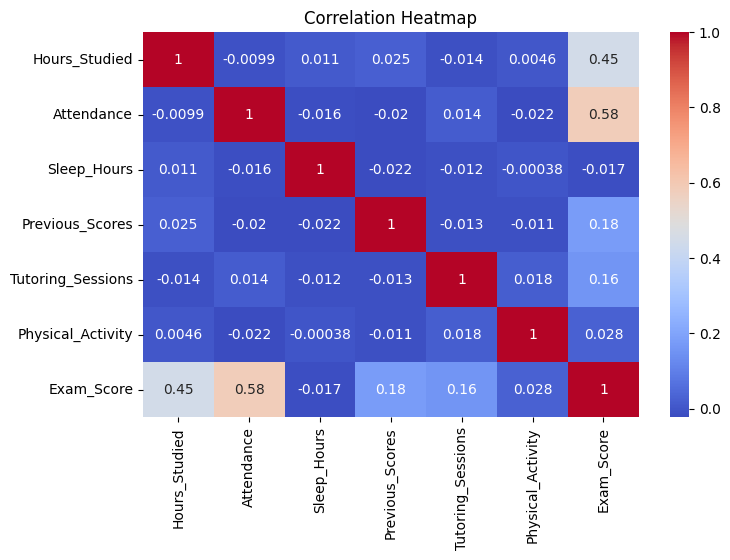

In [27]:
# Only numeric columns for correlation
plt.figure(figsize=(8, 5))
sns.heatmap(data.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


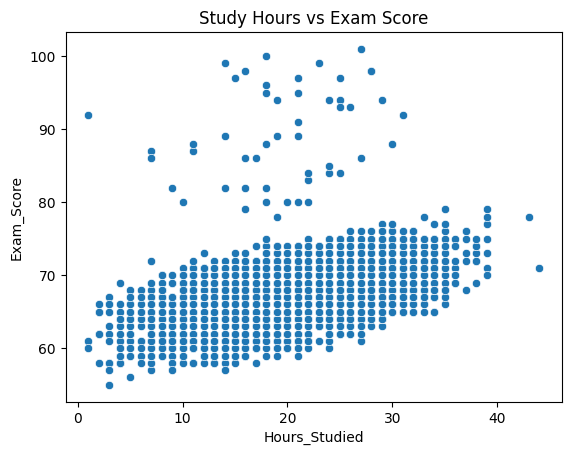

In [28]:
# Relationship between hours studied and exam score
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=data)
plt.title('Study Hours vs Exam Score')
plt.show()

In [29]:
X = data[['Hours_Studied', 'Sleep_Hours', 'Attendance', 'Previous_Scores']]
y = data['Exam_Score']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


In [31]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error: 1.36
Mean Squared Error: 5.35
Root Mean Squared Error: 2.31
R² Score: 0.62


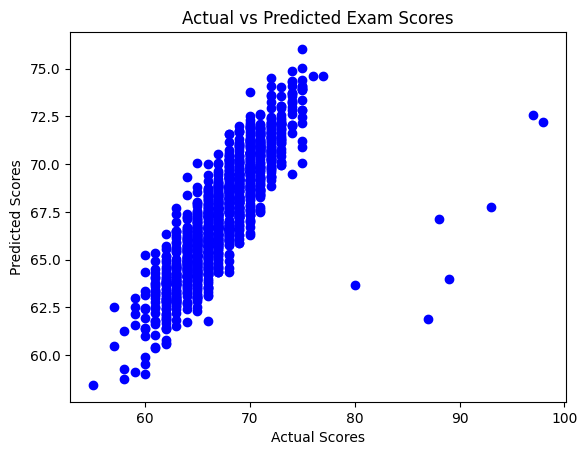

In [32]:
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.title('Actual vs Predicted Exam Scores')
plt.show()


In [33]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)

# Predict
y_poly_pred = poly_model.predict(poly.transform(X_test))

# Evaluate
r2_poly = r2_score(y_test, y_poly_pred)
print(f"R² Score (Polynomial Regression): {r2_poly:.2f}")


R² Score (Polynomial Regression): 0.62


In [34]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Model Performance:
MAE: 1.36
MSE: 5.35
RMSE: 2.31
R² Score: 0.62


In [35]:
import joblib

joblib.dump(model, "student_score_model.pkl")
print("\n Model saved successfully as 'student_score_model.pkl'")




 Model saved successfully as 'student_score_model.pkl'


In [37]:
# Step 9: Load & Test Saved Model
# ============================
loaded_model = joblib.load("student_score_model.pkl")
sample = [[5, 7, 85, 78]]  # Example input: [Hours_Studied, Sleep_Hours, Attendance, Previous_Scores]
predicted_score = loaded_model.predict(sample)
print(f"\nPredicted Exam Score for sample student: {predicted_score[0]:.2f}")


Predicted Exam Score for sample student: 64.07


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
